# Homework 4: Functions, Histograms,  Groups and Pivot Tables

**Reading**: Textbook chapter [7.2](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html) and chapter [8](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to import the relevant libraries. Each time you start your server, you will need to execute this cell again.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## 1. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [72]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters


Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [73]:
def word_count(x):
    return len(x.split(" "))
    
    
    

word_count(tale_chapters.column("Chapter text").item(0))

911

**Question 2.** Use the `apply` function on the table from before to create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

In [74]:
chapter_lengths= tale_chapters.apply(word_count, "Chapter text")
chapter_lengths

array([ 911, 1827, 1468, 3994])

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [75]:
def character_count(string):
    return string.replace(" ","")
    string.replace(".","")
    string.replace("!","")
    string.replace("?","")
    
len(character_count(tale_chapters.column("Chapter text").item(0)))


4882

## 2. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [76]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston")
boston.show(4)
print("Manila")
manila.show(4)

Boston


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

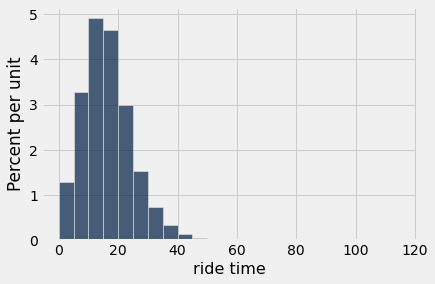

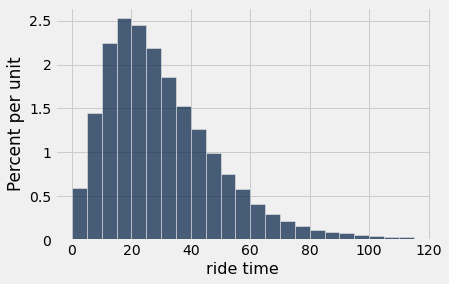

In [77]:
bins = np.arange(0, 120, 5)
boston.hist("ride time", bins=np.arange(0,120,5))
manila.hist("ride time", bins=np.arange(0,120,5))

**Question 2** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers.

In [78]:
boston_under_10 = (1.3*5)+(3.3*5)
manila_under_10 = (0.6*5)+(1.4*5)
print('boston_under_10: ', boston_under_10 , ' , ' 'manila_under_10: ', manila_under_10)

boston_under_10:  23.0  , manila_under_10:  10.0


In [79]:
test=boston.where("ride time", are.below(10)).column(3)
test

array([1.7235    , 7.9155    , 8.20816667, ..., 8.43133333, 8.29166667,
       4.03766667])

**Question 3** Now use the data to calculate the percentage of rides that are less than 10 minutes in Boston and Manila.

In [80]:
boston_under_10 = len(boston.where("ride time", are.below(10)).column(3))/len(boston.column(3))
manila_under_10 = len(manila.where("ride time", are.below(10)).column(3))/len(manila.column(3))
print('boston_under_10: ', boston_under_10 , ' , ' 'manila_under_10: ', manila_under_10)

boston_under_10:  0.22829  , manila_under_10:  0.10039


## 3. Faculty salaries


In the next cell we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/), containing berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [6]:
profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015))\
                                       .drop("year", "title")\
                                       .relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1** Set `prof_names` to a table with two columns. The first column should be called "department" and have the name of every department once, and the second column should be called "faculty" and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [82]:
# Pick between the two functions defined below 
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [83]:
prof_names = profs.select(1,0).group("department", list) ##üst kısmı anlamadım tekrar bak!!
prof_names

department,name list
African American Studies,"['AYA DE LEON', 'CHIYUMA ELLIOTT', 'NIKKI JONES', 'DAVID ..."
Agricultural and Resource Economics and Policy,"['MAXIMILIAN AUFFHAMMER', 'CHARLES GIBBONS', 'JEFFREY PE ..."
Anthroplogy,"['SABRINA AGARWAL', 'STANLEY BRANDES', 'CHARLES BRIGGS', ..."
Architecture,"['MARK ANDERSON', 'JACOB ATHERTON', 'WILLIAM ATWOOD', 'R ..."
Art History,"['DILIANA ANGELOVA', 'PATRICIA BERGER', 'JULIA BRYAN-WIL ..."
Art Practice,"['ALLAN DESOUZA', 'AIDA GAMEZ', 'RANDY HUSSONG', 'JENNIF ..."
Astronomy,"['GIBOR BASRI', 'STEVEN BECKWITH', 'LEO BLITZ', 'EUGENE ..."
Bioengineering,"['ADAM ARKIN', 'IRINA CONBOY', 'STEVEN CONOLLY', 'JOHN D ..."
Biology,"['DAVID ACKERLY', 'HILLEL ADESNIK', 'KELLY AGNEW', 'DORI ..."
Buddhist Studies,['JANN RONIS']


**Question 2** At the moment, the ```name``` column is sorted by last name. Would the arrays you generated in the previous part be the same as if we had sorted by first name instead? When we say that two arrays are the same, we mean that they contain the same number of elements and the elements in the corresponding positions are identical. Explain your answer. If you feel you need to make certain assumptions about the data, feel free to state them in your response. 

If the name column is sorted by last name, array elements we generated will also change. because when we sort by last name, we change the elements of the array. for example, corresponding array for biology department, if we sort by last name, will be ['ACKERLY DAVID' ....] so 'David Ackerly' is no longer elements of new array. Furthermore, All indexes will change after sorting by last name so it wouldnt be the same.

**Question 3** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the difference between the lowest and highest salaries in the department. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Think about what functions we have discussed can combine and give you this range. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [16]:
test=profs.select("department","gross_salary").group(0,min)
test

department,gross_salary min
African American Studies,14422
Agricultural and Resource Economics and Policy,16062
Anthroplogy,16830
Architecture,2010
Art History,23567
Art Practice,883
Astronomy,14826
Bioengineering,69336
Biology,5462
Buddhist Studies,53555


In [7]:
# Define salary_range in this cell
salary_range_max= profs.select("department","gross_salary").group(0,max).column(1)
salary_range_min=profs.select("department","gross_salary").group(0,min).column(1)
salary_range=salary_range_max-salary_range_min
salary_range



In [85]:
department_ranges = profs.select("department","gross_salary").group(0).with_column("salary range", salary_range).sort("salary range", descending=True)
biggest_range_dept= department_ranges.column(0).item(0)
biggest_range_dept


'Economics'

## 4. Causes of Death by Year

This exercise is designed to give you practice using the Table method `pivot`. [Here](http://data8.org/sp18/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

We'll be looking at a dataset from the California Department of Public Health (available [here](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013)) that records the cause of death (as recorded on a death certificate) for everyone who died in California from 1999 to 2013.  The data are in the file `causes_of_death.csv.zip`.  Each row records the number of deaths by one cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [86]:
causes = Table.read_table('causes_of_death.csv')
causes

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


In [87]:
test=causes.where("Cause of Death", "DIA")
test


Year,ZIP Code,Cause of Death,Count,Location
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90010,DIA,1,"(34.060633, -118.302664)"
1999,90014,DIA,1,"(34.044272, -118.250937)"
1999,90015,DIA,1,"(34.043439, -118.271613)"
1999,90017,DIA,1,"(34.055864, -118.266582)"
1999,90049,DIA,1,"(34.066, -118.473967)"
1999,90064,DIA,1,"(34.035279, -118.425911)"
1999,90068,DIA,1,"(34.115625, -118.330476)"
1999,90077,DIA,1,"(34.111245, -118.450155)"
1999,90245,DIA,1,"(33.924275, -118.411924)"


In [88]:
test.pivot("Cause of Death", "Year")

Year,DIA
1999,1515
2000,1519
2001,1523
2002,1537
2003,1529
2004,1515
2005,1529
2006,1529
2007,1532
2008,1537


The causes of death in the data are abbreviated.  We've provided a table called `abbreviations.csv` to translate the abbreviations.

In [89]:
abbreviations = Table.read_table('abbreviations.csv')
abbreviations.show()

Cause of Death,Cause of Death (Full Description)
AID,Acquired Immune Deficiency Syndrome (AIDS)
ALZ,Alzheimer's Disease
CAN,Malignant Neoplasms (Cancers)
CLD,Chronic Lower Respiratory Disease (CLRD)
CPD,Chronic Obstructive Pulmonary Disease (COPD)
DIA,Diabetes Mellitus
HIV,Human Immunodeficiency Virus Disease (HIVD)
HOM,Homicide
HTD,Diseases of the Heart
HYP,Essential Hypertension and Hypertensive Renal Disease


The dataset is missing data on certain causes of death for certain years.  It looks like those causes of death are relatively rare, so for some purposes it makes sense to drop them from consideration.  Of course, we'll have to keep in mind that we're no longer looking at a comprehensive report on all deaths in California.

**Question 1.** Let's clean up our data. First, filter out the HOM, HYP, and NEP rows from the table for the reasons described in the above paragraph. Next, join together the abbreviations table and our causes of death table so that we have a more detailed discription of each disease in each row. Lastly, drop the column which contains the acronym of the disease, and rename the column with the full description 'Cause of Death'. Assign the variable `cleaned_causes` to the resulting table. 

In [90]:
cleaned_causes = causes.where("Cause of Death", are.not_containing("HOM")).where("Cause of Death", are.not_containing("HYP")).where("Cause of Death", are.not_containing("NEP")).join("Cause of Death", abbreviations, "Cause of Death").drop(0).relabeled(4,"Cause of Death") 
cleaned_causes

Year,ZIP Code,Count,Location,Cause of Death
1999,90006,1,"(34.049323, -118.291687)",Alzheimer's Disease
1999,90007,1,"(34.029442, -118.287095)",Alzheimer's Disease
1999,90012,1,"(34.061396, -118.238479)",Alzheimer's Disease
1999,90015,1,"(34.043439, -118.271613)",Alzheimer's Disease
1999,90017,1,"(34.055864, -118.266582)",Alzheimer's Disease
1999,90020,1,"(34.066535, -118.302211)",Alzheimer's Disease
1999,90031,1,"(34.078349, -118.211279)",Alzheimer's Disease
1999,90033,1,"(34.048676, -118.208442)",Alzheimer's Disease
1999,90042,1,"(34.114527, -118.192902)",Alzheimer's Disease
1999,90044,1,"(33.955089, -118.290119)",Alzheimer's Disease


We're going to examine the changes in causes of death over time.  To make a plot of those numbers, we need to have a table with one row per year, and the information about all the causes of death for each year.

**Question 2.** Create a table with one row for each year and a column for each kind of death, where each cell contains the number of deaths by that cause in that year. Call the table `cleaned_causes_by_year`.

In [91]:
cleaned_causes_by_year = cleaned_causes.pivot("Cause of Death", "Year") ##DATA garip duruyor tekrar bak!!
cleaned_causes_by_year.show(15)

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
2000,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519
2001,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523
2002,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537
2003,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529
2004,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
2005,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529
2006,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529
2007,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532
2008,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537


**Question 3.** Make a plot of all the causes of death by year, using your cleaned-up version of the dataset.  There should be a single plot with one line per cause of death.

*Hint:* Use the Table method `plot`.  If you pass only a single argument, a line will be made for each of the other columns.

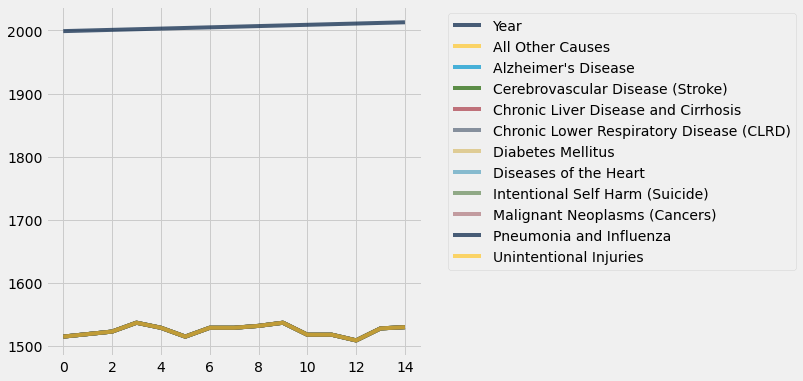

In [92]:
cleaned_causes_by_year.plot()

After seeing the plot above, we would now like to examine the distributions of diseases over the years using percentages. Below, we have assigned `distributions` to a table with all of the same columns, but the raw counts in the cells are replaced by the percentage of the the total number of deaths by a particular disease that happened in that specific year. 

Try to understand the code below. 

In [93]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

labels = cleaned_causes_by_year.labels
distributions = Table().with_columns(labels[0], cleaned_causes_by_year.column(0),
                                     labels[1], percents(cleaned_causes_by_year.column(1)),
                                     labels[2], percents(cleaned_causes_by_year.column(2)),
                                     labels[3], percents(cleaned_causes_by_year.column(3)),
                                     labels[4], percents(cleaned_causes_by_year.column(4)),
                                     labels[5], percents(cleaned_causes_by_year.column(5)),
                                     labels[6], percents(cleaned_causes_by_year.column(6)),
                                     labels[7], percents(cleaned_causes_by_year.column(7)),
                                     labels[8], percents(cleaned_causes_by_year.column(8)),
                                     labels[9], percents(cleaned_causes_by_year.column(9)),
                                     labels[10], percents(cleaned_causes_by_year.column(10)),
                                     labels[11], percents(cleaned_causes_by_year.column(11)))
distributions.show()

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62
2000,6.64,6.64,6.64,6.64,6.64,6.64,6.64,6.64,6.64,6.64,6.64
2001,6.66,6.66,6.66,6.66,6.66,6.66,6.66,6.66,6.66,6.66,6.66
2002,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72
2003,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69
2004,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62,6.62
2005,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69
2006,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69,6.69
2007,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7
2008,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72,6.72


**Question 4.** What is the sum (roughly) of each of the columns (except the Year column) in the table above? Why does this make sense? 

In [94]:
distributions.column(3).sum()

100.0

we get 100% percent. Because we have the data for the deaths between 1999 and 2013. If we sum all the columns percentage we reach the total of the data which is 100% as a result.

**Question 5:** We suspect that the larger percentage of stroke-related deaths over the years 1999-2013 happened in the earlier years, while the larger percentage of Chronic Liver Disease-related deaths over this time period occured in the most recent years. Draw a bar chart to display both of the distributions of these diseases over the time period. 

*Hint:* The relevant column labels are "Cerebrovascular Disease (Stroke)" and "Chronic Liver Disease and Cirrhosis"

In [95]:
test=distributions.select("Year","Cerebrovascular Disease (Stroke)","Chronic Liver Disease and Cirrhosis")
test

Year,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis
1999,6.62,6.62
2000,6.64,6.64
2001,6.66,6.66
2002,6.72,6.72
2003,6.69,6.69
2004,6.62,6.62
2005,6.69,6.69
2006,6.69,6.69
2007,6.7,6.7
2008,6.72,6.72


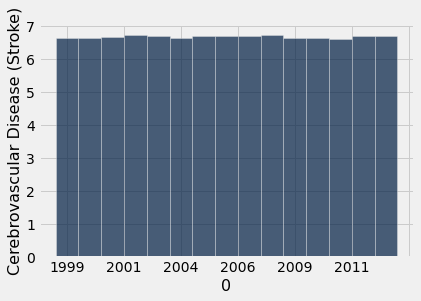

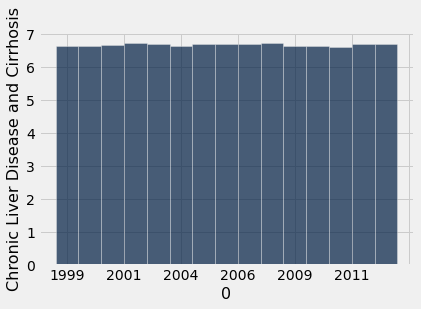

In [96]:
test.bar(0,1)
test.bar(0,2)

Congratulations! You have completed Homework 4! Please make sure you run all the cells before submitting your notebook.